<a href="https://colab.research.google.com/github/StevenBlaine/MLA_SRB/blob/main/FinalProject_Regression_SRB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project Problem 1 - Regression** #  
**Steven Blaine
<br>CS430-ON
<br>Machine Learning in the Cloud** 

## Step 1: Imports

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Imports for Specific Models
 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

### Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

### Confusion Matrix Function
Function for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

### Straight Line Plot Function

In [ ]:
def abline(slope, intercept,color):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c=color)

### Step 2: Acquire Data (Reading the Data)

Found in the UCI collection, this data set contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/heart_failure_clinical_records_dataset.csv')

### Step 3: Statistical and Visual Exploration

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
93,60.0,1,154,0,25,0,210000.00,1.70,135,1,0,82,1
274,60.0,1,257,1,30,0,150000.00,1.00,137,1,1,245,0
281,70.0,0,582,0,40,0,51000.00,2.70,136,1,1,250,0
56,70.0,1,75,0,35,0,223000.00,2.70,138,1,1,54,0
50,68.0,1,577,0,25,1,166000.00,1.00,138,1,0,43,1
14,49.0,1,80,0,30,1,427000.00,1.00,138,0,0,12,0
90,70.0,0,66,1,45,0,249000.00,0.80,136,1,1,80,0
287,45.0,0,582,1,55,0,543000.00,1.00,132,0,0,250,0
105,72.0,1,328,0,30,1,621000.00,1.70,138,0,1,88,1
24,75.0,0,582,1,30,1,263358.03,1.83,134,0,0,23,1


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [ ]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
df.age.value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64

Converting age to integer type.

In [ ]:
df['age'] = df['age'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


Bar plot for certain attribute.

In [ ]:
df.sort_values('age', ascending = True, inplace = True)

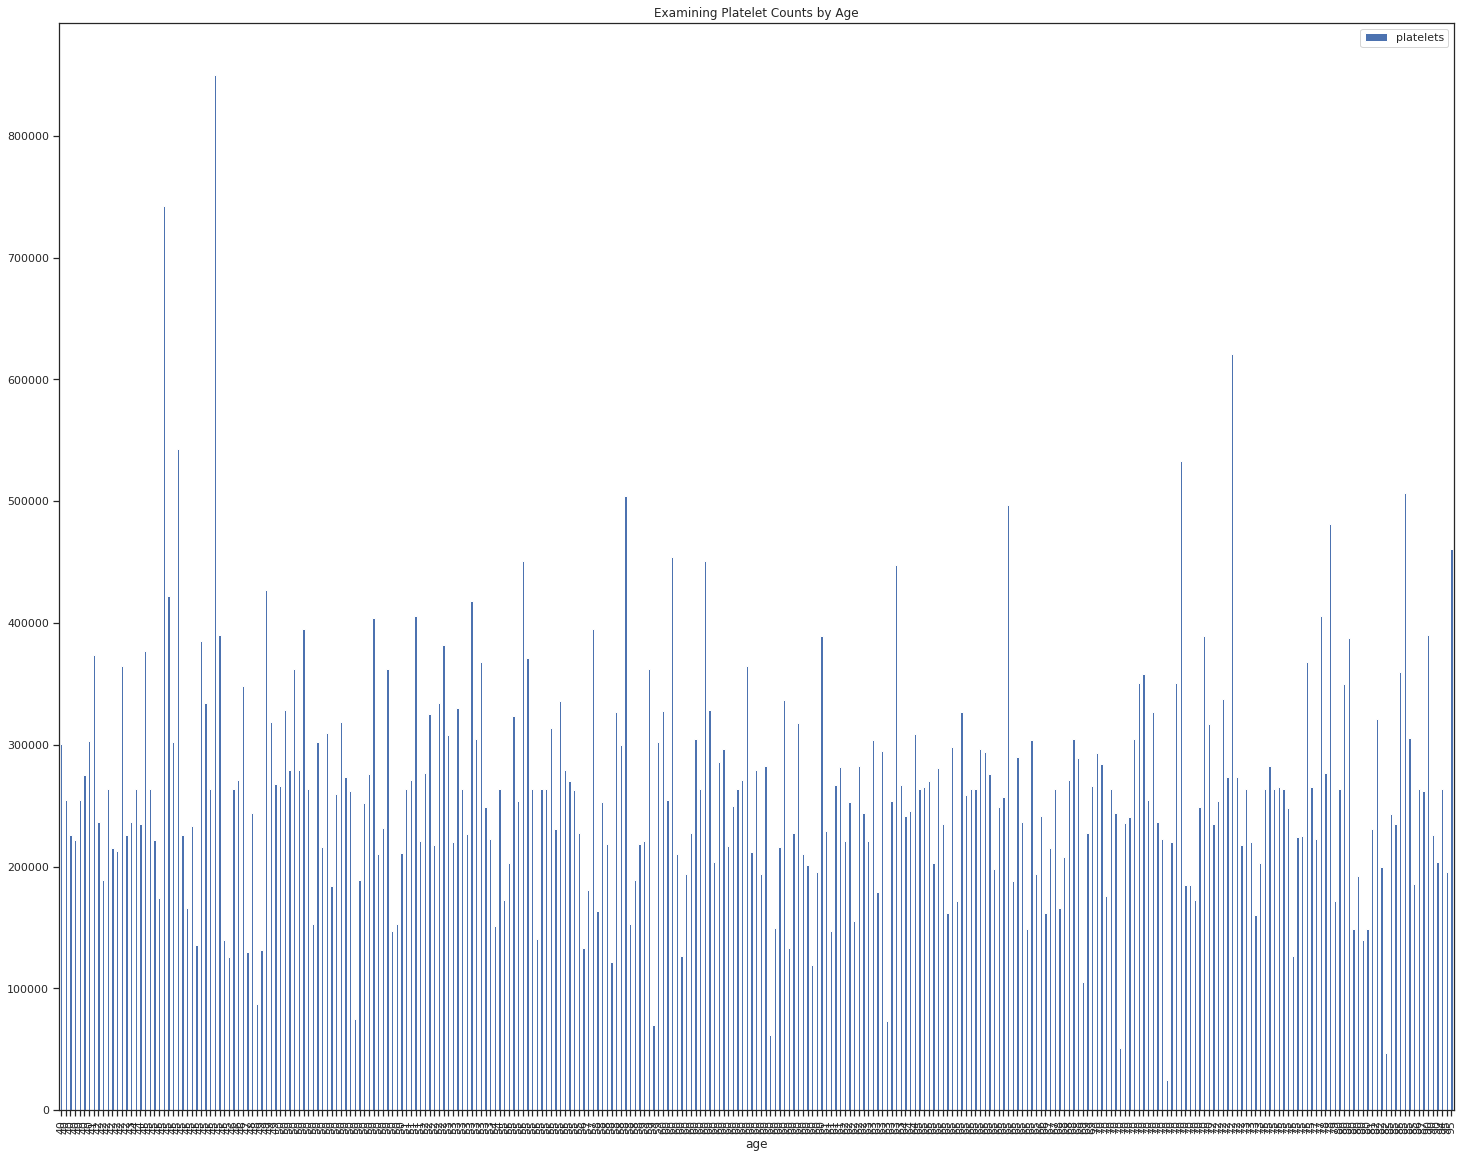

In [ ]:
df.plot(kind = 'bar', x='age', y=['platelets'], title = 'Examining Platelet Counts by Increasing Age', figsize=(25,20))

Box plots for certain attributes.

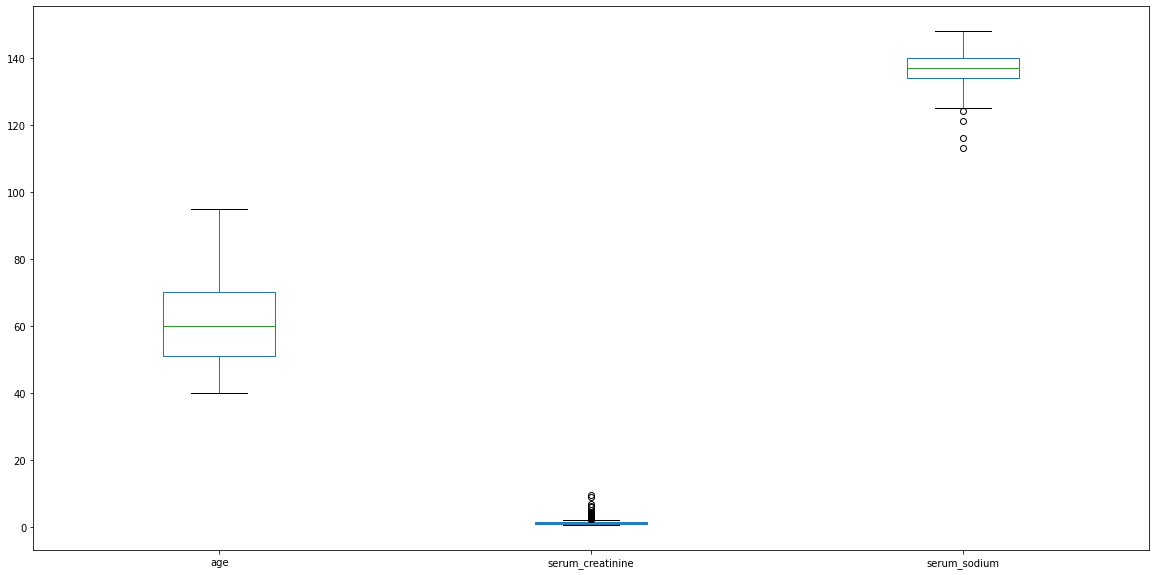

In [ ]:
df.boxplot(column =['age', 'serum_creatinine', 'serum_sodium'], figsize = [20,10], grid = False)

Pairplots.

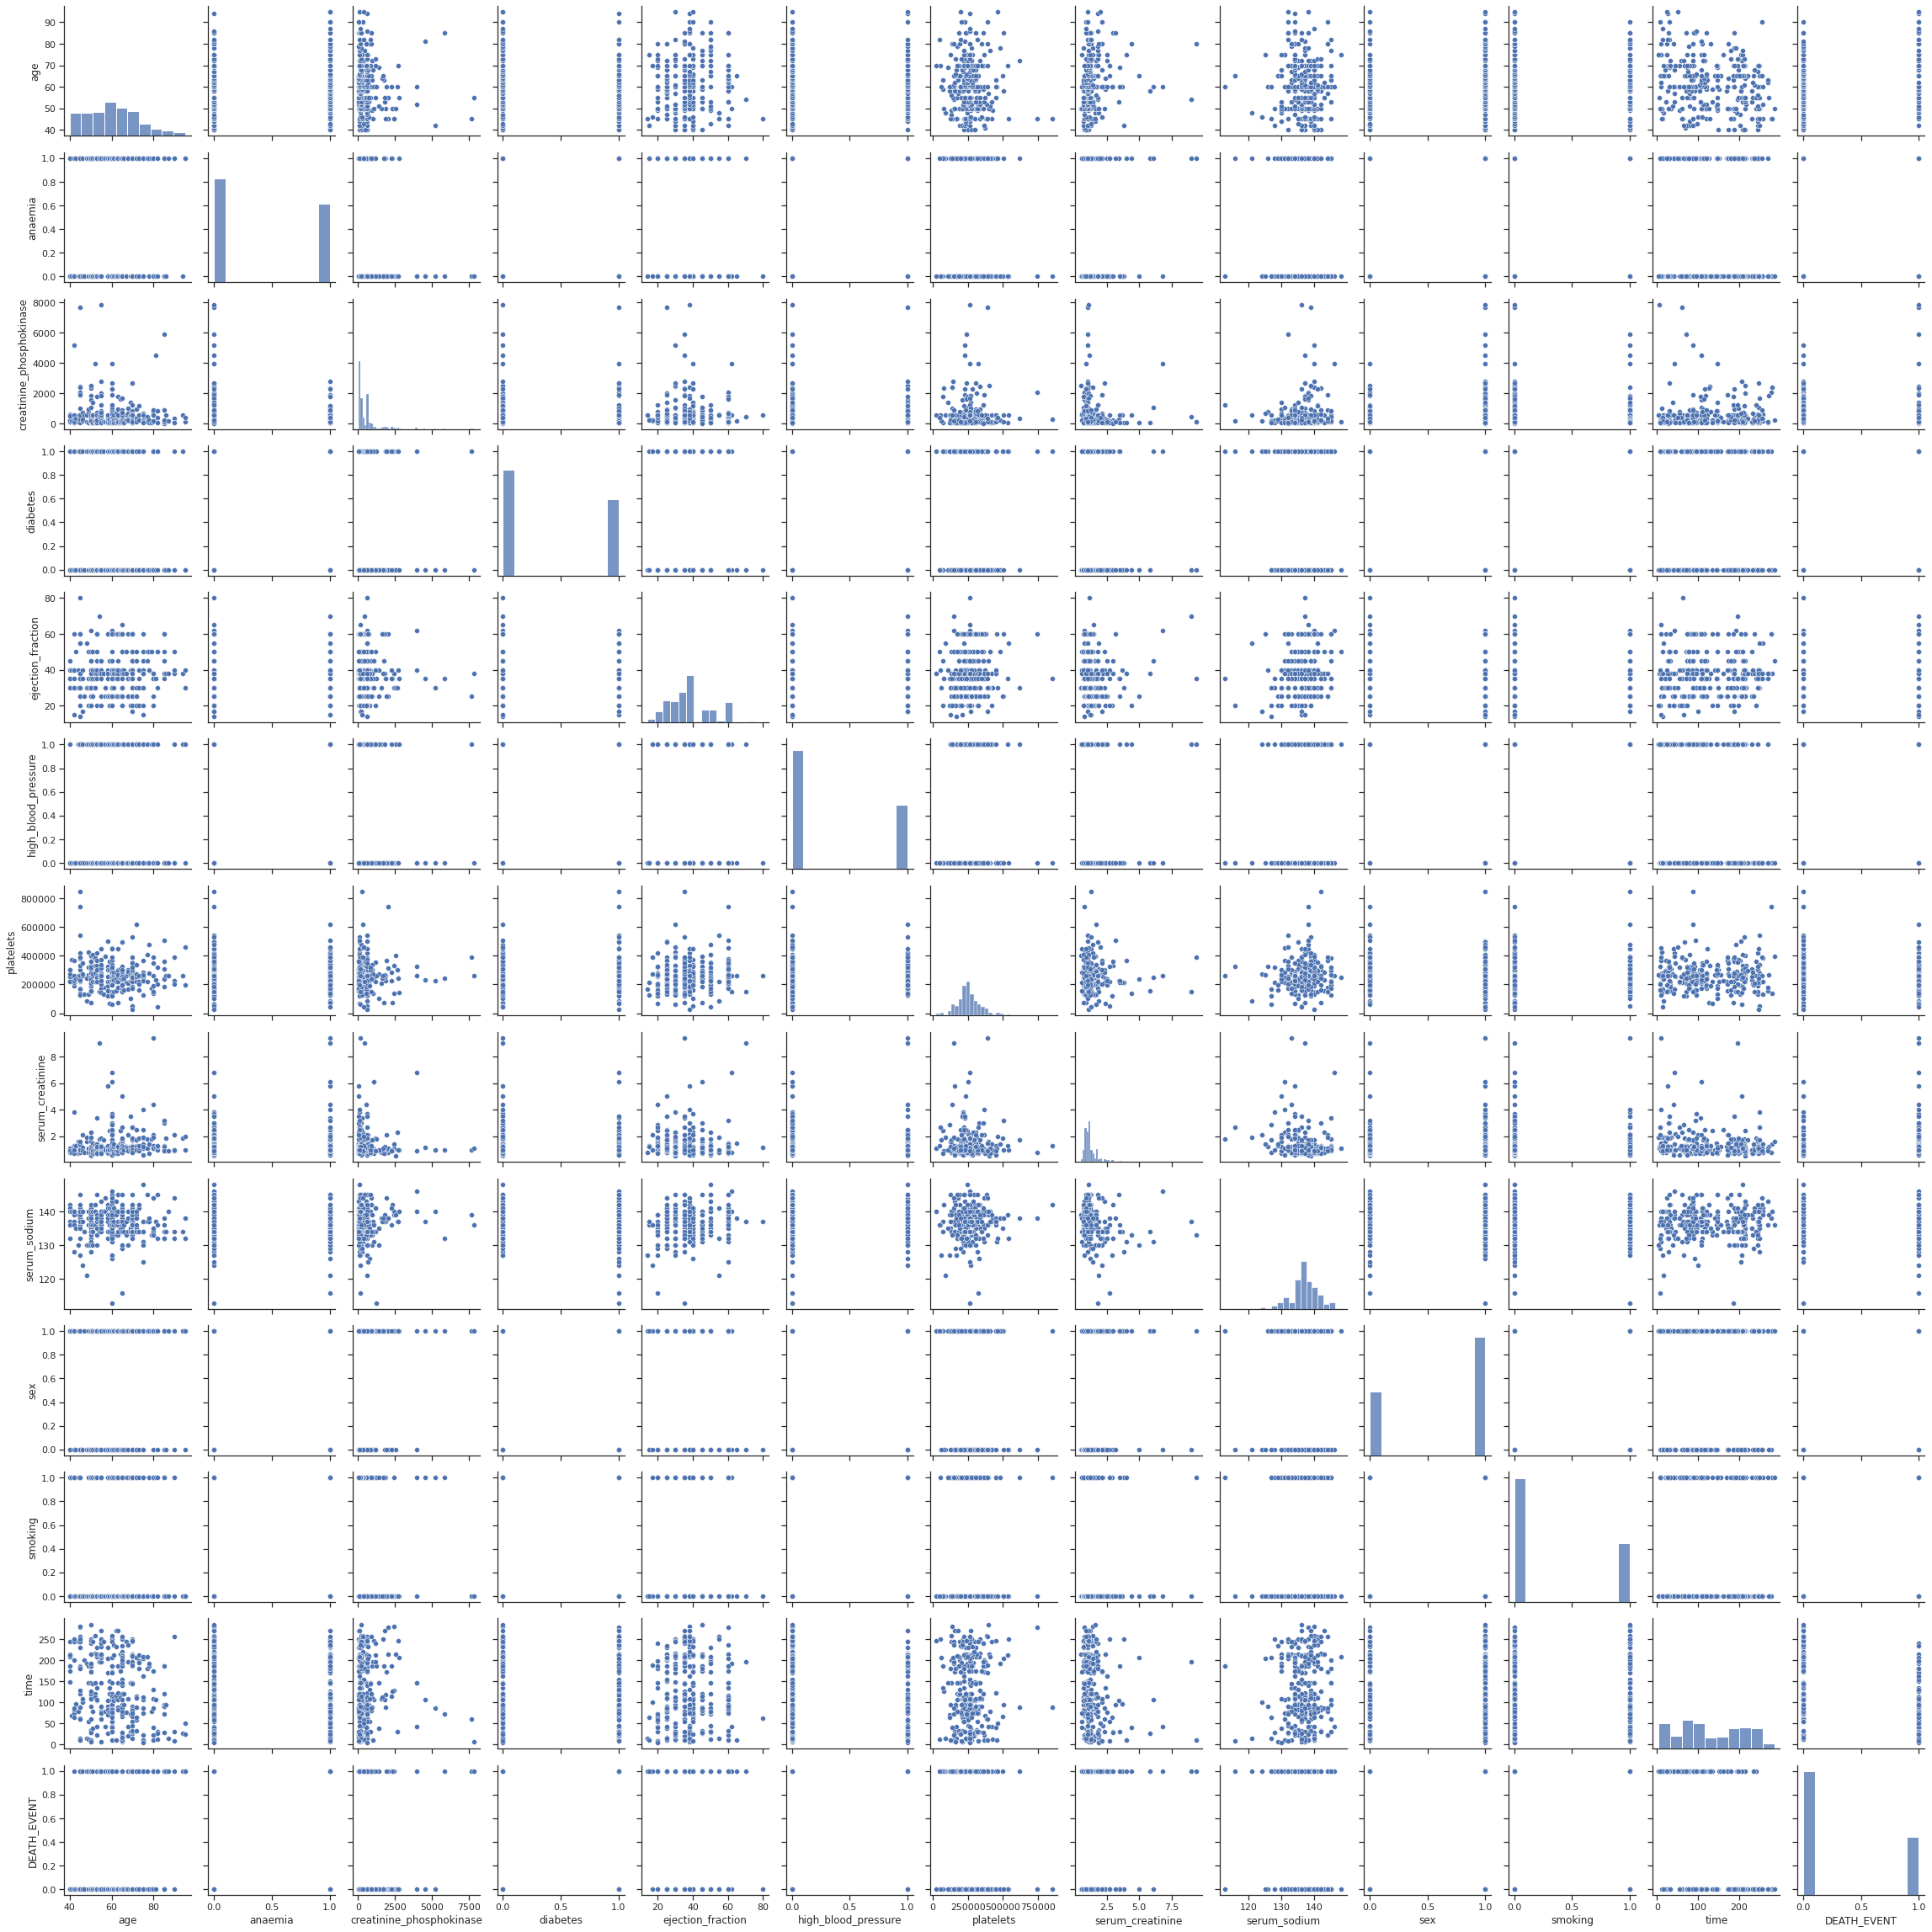

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df)
plt.show()

### Step 4: Creating DataFrames and Splitting the Data

Creating X DataFrame.

In [ ]:
X = df.iloc[:,0:-1]

Creating y DataFrame. 

In [ ]:
y = df[['DEATH_EVENT']]

Splitting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

### Step 5A: Building a Linear Regression Pipeline

Creating column transformer that will MinMax scale numerical variables.

In [ ]:
num_attribs = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

In [ ]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(),num_attribs)], 
                               remainder='passthrough')

Creating pipeline that will transform the data and run the Linear Regression algorithm.


In [ ]:
LRpipeline = Pipeline([
                     ('transform', col_transform),
                     ('mlr_model', LinearRegression()),
])

### Step 6A: Executing the Linear Regression Model

In [ ]:
LRpipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['age', 'anaemia',
                                                   'creatinine_phosphokinase',
                                                   'diabetes',
                                                   'ejection_fraction',
                                                   'high_blood_pressure',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'sex',
                                                   'smoking', 'time'])])),
                ('mlr_model', LinearRegression())])

Running the pipeline to fit the model.

---



In [ ]:
LRpipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['age', 'anaemia',
                                                   'creatinine_phosphokinase',
                                                   'diabetes',
                                                   'ejection_fraction',
                                                   'high_blood_pressure',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'sex',
                                                   'smoking', 'time'])])),
                ('mlr_model', LinearRegression())])

### Step 7A: Evaluating the Linear Regression Model

Running pipeline to predict y values from the test data set and saving them in a variable called y_pred.

In [ ]:
y_pred = LRpipeline.predict(X_test)

Root Mean Squared Error ("RSME") for the training and testing sets.

In [ ]:
print(mean_squared_error(y_test, y_pred)**(0.5))

0.3992349103235695


In [ ]:
y_pred = LRpipeline.predict(X_train)
print(mean_squared_error(y_train, y_pred)**(0.5))

0.34934535095153696


RSME Interpretational Note: as an experiment (in contrast to usual practice), it is necessary to run the model on the training set in order to obtain the value for that set. Interestingly, the values here differ somewhat, raising some concern about model consistency.

### Step 5B: Building a Support Vector Machine Pipeline

In [ ]:
SVMpipeline = Pipeline([
                     ('trans', col_transform),
                     ('SVR', SVR(kernel="linear", C=75, max_iter=1000000, epsilon=0.0))
                     ])

###Step 6B: Executing the Support Vector Machine Model

In [ ]:
SVMpipeline.fit(X_train,y_train.values.ravel())

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['age', 'anaemia',
                                                   'creatinine_phosphokinase',
                                                   'diabetes',
                                                   'ejection_fraction',
                                                   'high_blood_pressure',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'sex',
                                                   'smoking', 'time'])])),
                ('SVR',
                 SVR(C=75, epsilon=0.0, kernel='linear', max_iter=1000000))])

###Step 7B: Evaluating the Support Vector Machine Model 

In [ ]:
y_pred = SVMpipeline.predict(X_test)
print(mean_squared_error(y_test, y_pred)**(0.5))

0.4188248332770992


In [ ]:
y_pred = SVMpipeline.predict(X_train)
print(mean_squared_error(y_train, y_pred)**(0.5))

0.3533239662597235


As seen above with the Linear Regression model, the RSME values here differ somewhat, raising concern about model consistency.

###Step 7C: Using Gridsearch with the Support Vector Machine Model

In [ ]:
parameters = {'SVR__kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}

In [ ]:
grid_pipeline = GridSearchCV(SVMpipeline, param_grid = parameters, scoring='r2',cv=5)

In [ ]:
grid_pipeline

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'anaemia',
                                                                          'creatinine_phosphokinase',
                                                                          'diabetes',
                                                                          'ejection_fraction',
                                                                          'high_blood_pressure',
                                                                          'platelets',
                                                                          'serum_creatinine',
                                                                          'serum_sodium',
                                                                          'sex',
                                                                          'smoking',
                                                                          'time'])])),
                                       ('SVR',
                                        SVR(C=75, epsilon=0.0, kernel='linear',
                                            max_iter=1000000))]),
             param_grid={'SVR__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2')

In [ ]:
grid_pipeline.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'anaemia',
                                                                          'creatinine_phosphokinase',
                                                                          'diabetes',
                                                                          'ejection_fraction',
                                                                          'high_blood_pressure',
                                                                          'platelets',
                                                                          'serum_creatinine',
                                                                          'serum_sodium',
                                                                          'sex',
                                                                          'smoking',
                                                                          'time'])])),
                                       ('SVR',
                                        SVR(C=75, epsilon=0.0, kernel='linear',
                                            max_iter=1000000))]),
             param_grid={'SVR__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2')

In [ ]:
y_pred2 = grid_pipeline.predict(X_train)
print(mean_squared_error(y_train, y_pred2)**(0.5))

0.3533239662597235


In [ ]:
grid_pipeline.best_params_

{'SVR__kernel': 'linear'}

In [ ]:
grid_pipeline.score(X_test, np.ravel(y_test))

0.13612685705810668

###Step 7D: Selection and Application of Precision-Recall Curve

An ROC curve shows true positive rate as a function of false positive rate, and neither of those exists in the context of regression; so the choice was mad to apply a Precision-Recall Curve.

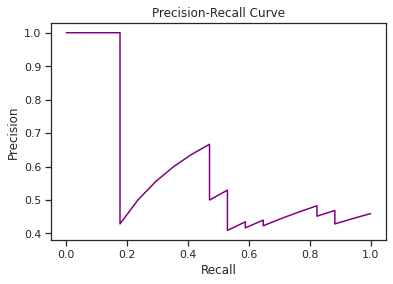

In [ ]:
y_pred = SVMpipeline.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

The x-axis shows the recall and the y-axis shows the precision for various thresholds. As recall increases, precision decreases -- here, quite drastically at the 0.2 recall mark.

### Step 8: Conclusion
The performance measures utilized above show that the Linear Regression and Support Vector Machine models perform similarly for the task of predicting a death event.  Further, the Gridsearch parameters tested here did not make much difference.